In [29]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [83]:
data = pd.read_excel('1390_train_data.xlsx')

In [ ]:
df = pd.DataFrame(data)
df.head()

,Additive concentration,MAI,FAI,CsI,CsBr,MABr,MACl,PbI2,PbBr2,PbCl2,...,DMF,DMSO,GBL,Polarity index,Annealing tem,Etl,Htl,Back contact,Interlayer,PCE (%)
0,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,5.200
1,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,4.828
2,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,4.836
3,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,5.070
4,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,4.980


In [85]:
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

(1390, 24) (1390,)


In [86]:
test_data = pd.read_excel('151_test_data.xlsx')
test_df = pd.DataFrame(test_data)
test_df.head()

,Additive concentration,MAI,FAI,CsI,CsBr,MABr,MACl,PbI2,PbBr2,PbCl2,...,DMSO,GBL,Polarity index,Annealing tem,Etl,Htl,Back contact,Interlayer,PCE (%),ref
0,0,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,16.23,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
1,2,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,17.14,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
2,4,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,18.22,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
3,5,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,16.80,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
4,0,2.00,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.5,...,0.00,0.0,0.0,1.1,3,8,2,0,14.00,3-Thiophenemalonic Acid Additive Enhanced Perf...


In [87]:
X_test = test_df.drop(['PCE (%)', 'ref'], axis= 1)
y_test = test_df['PCE (%)']
print(X_test.shape, y_test.shape)

(151, 24) (151,)


# Results for main data without synthetic data

In [88]:
np.random.seed(42)


xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("\nXGBoost Performance:")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("\nGradient Boosting Performance:")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")


XGBoost Performance:
RMSE: 2.1452
R² Score: 0.8219
MAE: 1.5764

Gradient Boosting Performance:
RMSE: 2.1312
R² Score: 0.8242
MAE: 1.5751


SHAP ANALYSIS
Features: 24
SHAP matrix: (151, 24)


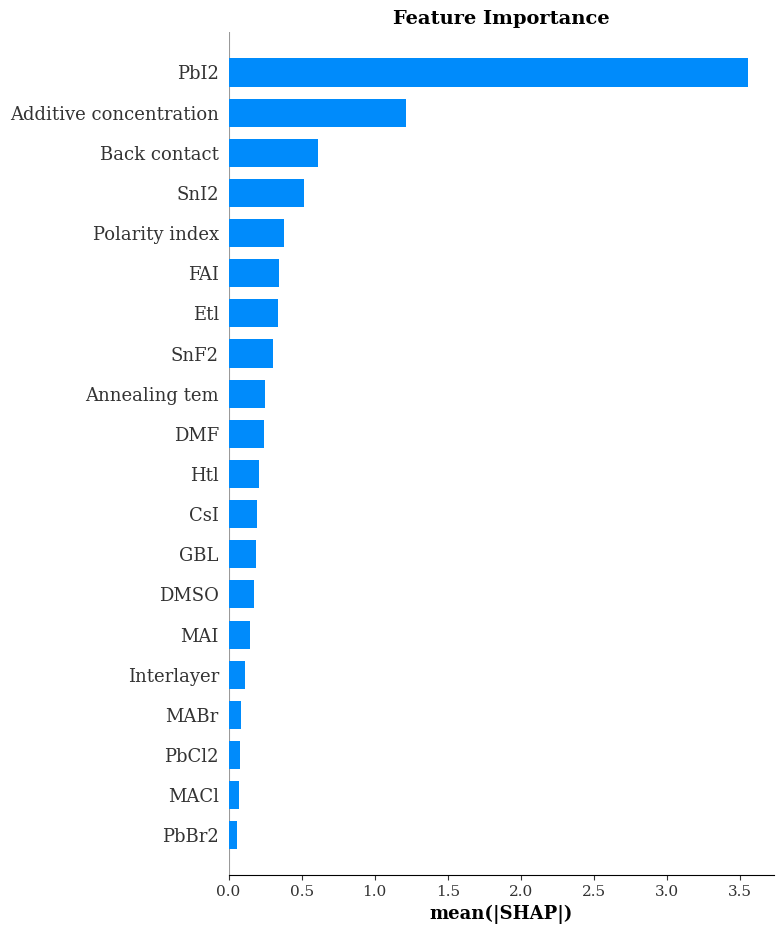

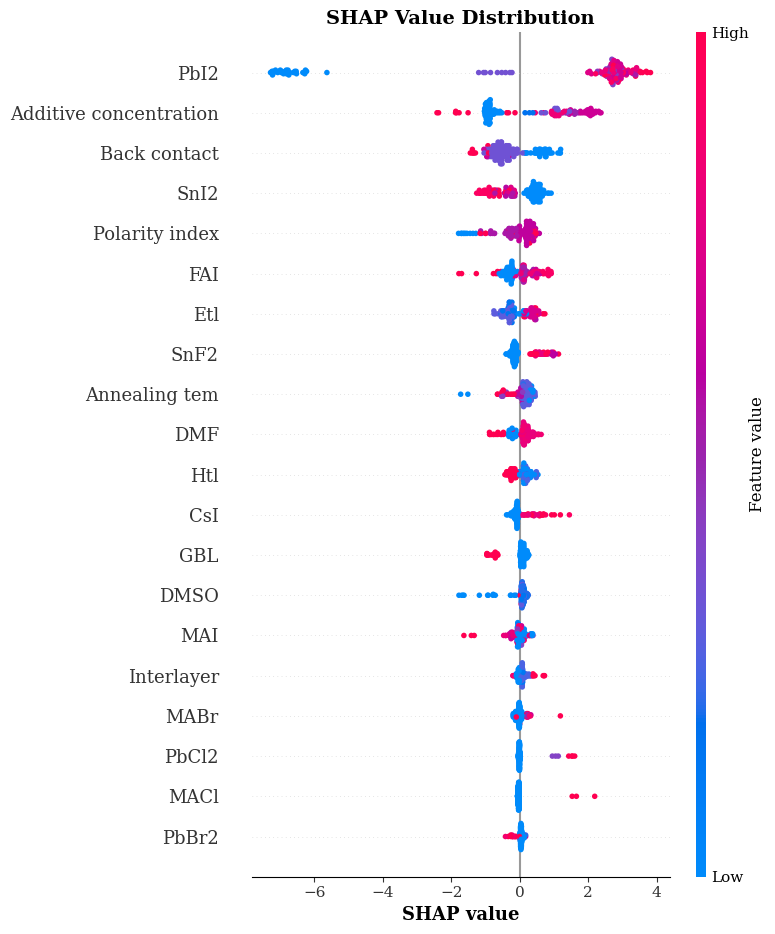

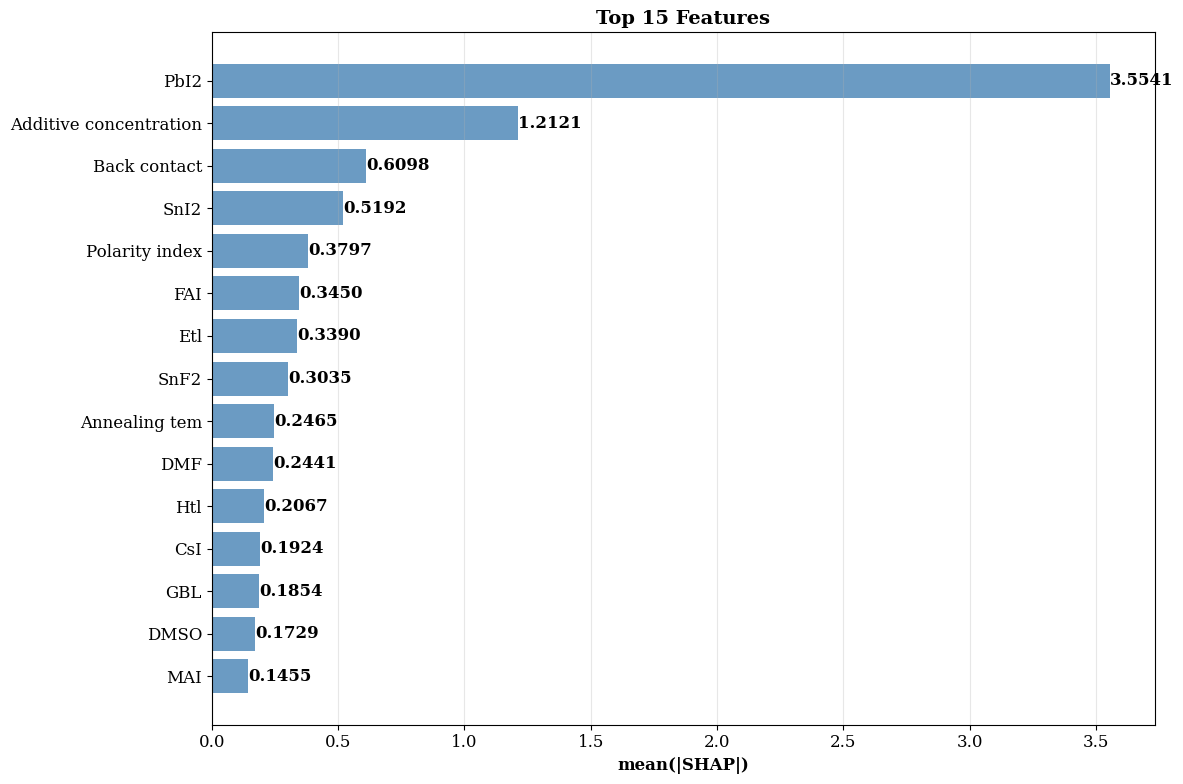

----------------------------------------------------------------------
BOOTSTRAP STABILITY
----------------------------------------------------------------------
Bootstrap: 30 iterations
Mean CV: 0.3739
Stable features (CV < 0.3): 4/20
Unstable features (CV > 0.5): 3/20


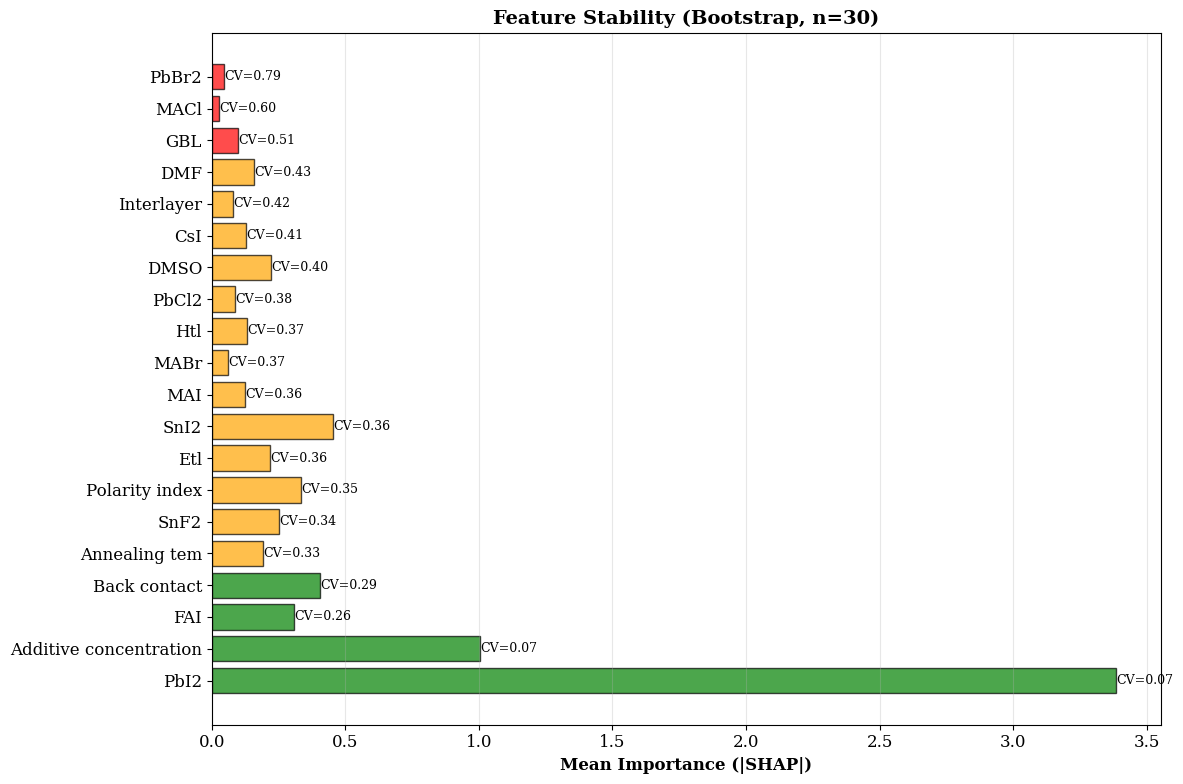

----------------------------------------------------------------------
TOP FEATURES CORRELATION
----------------------------------------------------------------------


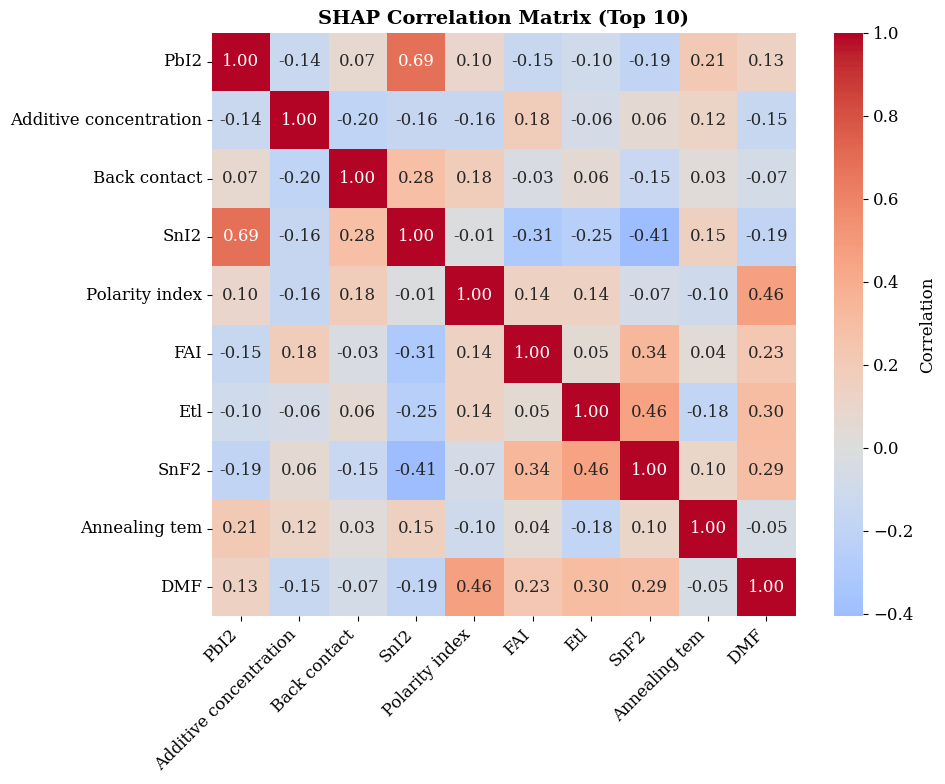

----------------------------------------------------------------------
ANALYSIS SUMMARY
----------------------------------------------------------------------
Top 5 features: PbI2, Additive concentration, Back contact, SnI2, Polarity index
Mean CV: 0.3739
Stable features: 4/20
Analysis complete.


In [89]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("="*70)
print("SHAP ANALYSIS")
print("="*70)

if hasattr(X_test, 'columns'):
    feature_names = X_test.columns.tolist()
else:
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns.tolist()
    else:
        feature_names = [f'Feature_{i}' for i in range(X_test.shape[1])]

if isinstance(X_train, np.ndarray):
    X_train_for_shap = pd.DataFrame(X_train, columns=feature_names)
    X_test_for_shap = pd.DataFrame(X_test, columns=feature_names)
else:
    X_train_for_shap = X_train
    X_test_for_shap = X_test

explainer = shap.Explainer(xgb_model.predict, X_train_for_shap)
shap_values = explainer(X_test_for_shap)

importance = np.abs(shap_values.values).mean(axis=0)

print(f"Features: {len(feature_names)}")
print(f"SHAP matrix: {shap_values.values.shape}")

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_for_shap, plot_type="bar", show=False)
plt.title("Feature Importance", fontweight='bold')
plt.xlabel("mean(|SHAP|)", fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_for_shap, show=False)
plt.title("SHAP Value Distribution", fontweight='bold')
plt.xlabel("SHAP value", fontweight='bold')
plt.tight_layout()
plt.show()

top_n = min(15, len(feature_names))
top_indices = np.argsort(-importance)[:top_n]
top_features = [feature_names[i] for i in top_indices]
top_importance = importance[top_indices]

plt.figure(figsize=(12, 8))
bars = plt.barh(range(top_n), top_importance[::-1], color='steelblue', alpha=0.8)
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel('mean(|SHAP|)', fontweight='bold')
plt.title(f'Top {top_n} Features', fontweight='bold')

for i, (bar, val) in enumerate(zip(bars, top_importance[::-1])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{val:.4f}', va='center', fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("-"*70)
print("BOOTSTRAP STABILITY")
print("-"*70)

def bootstrap_analysis(n_iterations=30):
    print(f"Bootstrap: {n_iterations} iterations")
    
    n_top_features = min(20, len(feature_names))
    top_feat_indices = np.argsort(-importance)[:n_top_features]
    
    bootstrap_importances = []
    
    for i in range(n_iterations):
        X_sample, y_sample = resample(X_train, y_train, random_state=i)
        
        model_temp = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=50,
            max_depth=4,
            learning_rate=0.1,
            random_state=i
        )
        
        if isinstance(X_sample, np.ndarray):
            X_sample_df = pd.DataFrame(X_sample, columns=feature_names)
        else:
            X_sample_df = X_sample
        
        model_temp.fit(X_sample_df, y_sample)
        
        explainer_temp = shap.PermutationExplainer(model_temp.predict, X_sample_df)
        
        if isinstance(X_test, np.ndarray):
            X_test_temp = pd.DataFrame(X_test, columns=feature_names)
        else:
            X_test_temp = X_test
        
        shap_temp = explainer_temp(X_test_temp)
        
        imp_temp = np.abs(shap_temp.values).mean(axis=0)
        bootstrap_importances.append(imp_temp[top_feat_indices])
    
    bootstrap_array = np.array(bootstrap_importances)
    
    cv_values = bootstrap_array.std(axis=0) / (bootstrap_array.mean(axis=0) + 1e-10)
    
    return pd.DataFrame({
        'Feature': [feature_names[i] for i in top_feat_indices],
        'Mean_Importance': bootstrap_array.mean(axis=0),
        'CV': cv_values,
        'Stable': cv_values < 0.3
    })

stability_results = bootstrap_analysis(n_iterations=30)

print(f"Mean CV: {stability_results['CV'].mean():.4f}")
print(f"Stable features (CV < 0.3): {stability_results['Stable'].sum()}/{len(stability_results)}")
print(f"Unstable features (CV > 0.5): {(stability_results['CV'] > 0.5).sum()}/{len(stability_results)}")

plt.figure(figsize=(12, 8))
stability_sorted = stability_results.sort_values('CV')
x_pos = np.arange(len(stability_sorted))
mean_imp = stability_sorted['Mean_Importance'].values
cv_values = stability_sorted['CV'].values

colors = ['green' if cv < 0.3 else 'orange' if cv < 0.5 else 'red' for cv in cv_values]
bars = plt.barh(x_pos, mean_imp, color=colors, alpha=0.7, edgecolor='black')

plt.yticks(x_pos, stability_sorted['Feature'].values)
plt.xlabel('Mean Importance (|SHAP|)', fontweight='bold')
plt.title(f'Feature Stability (Bootstrap, n=30)', fontweight='bold')

for i, (bar, cv) in enumerate(zip(bars, cv_values)):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'CV={cv:.2f}', va='center', fontsize=9)

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("-"*70)
print("TOP FEATURES CORRELATION")
print("-"*70)

top_10_indices = np.argsort(-importance)[:10]
top_10_features = [feature_names[i] for i in top_10_indices]
shap_top_10 = shap_values.values[:, top_10_indices]
corr_matrix = np.corrcoef(shap_top_10.T)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            xticklabels=top_10_features,
            yticklabels=top_10_features,
            square=True,
            cbar_kws={'label': 'Correlation'})

plt.title('SHAP Correlation Matrix (Top 10)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("-"*70)
print("ANALYSIS SUMMARY")
print("-"*70)

top_5_features = [feature_names[i] for i in np.argsort(-importance)[:5]]
mean_cv = stability_results['CV'].mean()
stable_count = stability_results['Stable'].sum()

print(f"Top 5 features: {', '.join(top_5_features)}")
print(f"Mean CV: {mean_cv:.4f}")
print(f"Stable features: {stable_count}/{len(stability_results)}")
print("Analysis complete.")

# Results on the combined dataset (original + synthetic)

In [76]:
data = pd.read_excel('5390_datapoints.xlsx')

In [77]:
data[data<0] = 0
df = pd.DataFrame(data)
df.head()

,Additive concentration,MAI,FAI,CsI,CsBr,MABr,MACl,PbI2,PbBr2,PbCl2,...,DMF,DMSO,GBL,Polarity index,Annealing tem,Etl,Htl,Back contact,Interlayer,PCE (%)
0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,5.200
1,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,4.828
2,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,4.836
3,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,5.070
4,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,4.980


In [78]:
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

(5390, 24) (5390,)


In [81]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("\nXGBoost Performance:")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("\nGradient Boosting Performance:")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")


XGBoost Performance:
RMSE: 1.8505
R² Score: 0.8675
MAE: 1.4667

Gradient Boosting Performance:
RMSE: 1.8825
R² Score: 0.8628
MAE: 1.4835


SHAP ANALYSIS
Features: 24
SHAP matrix: (151, 24)


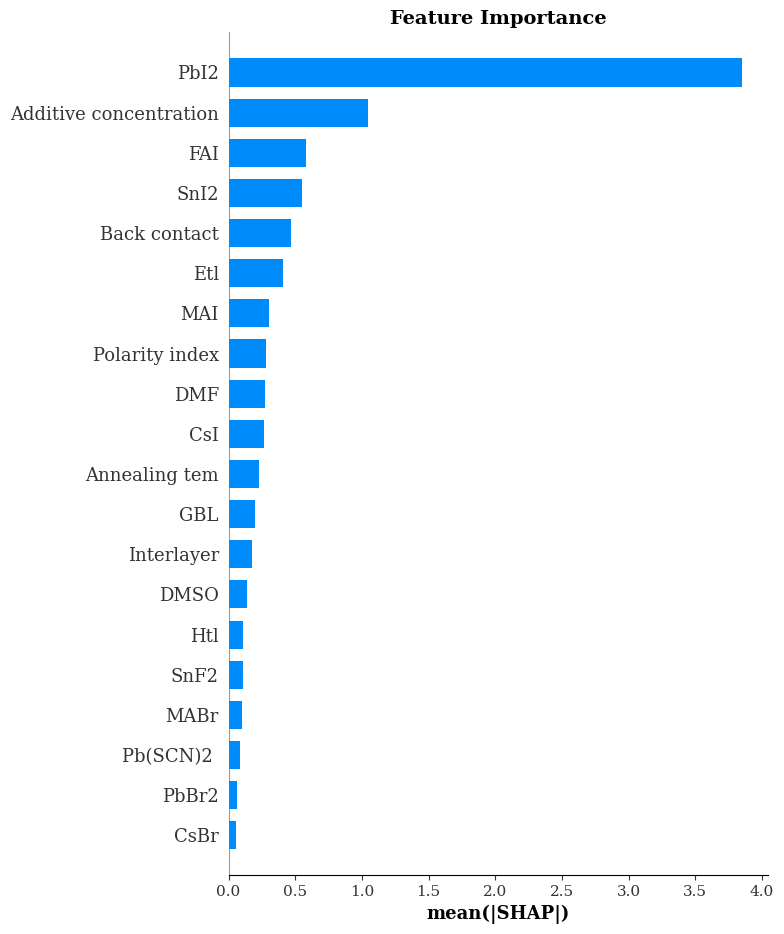

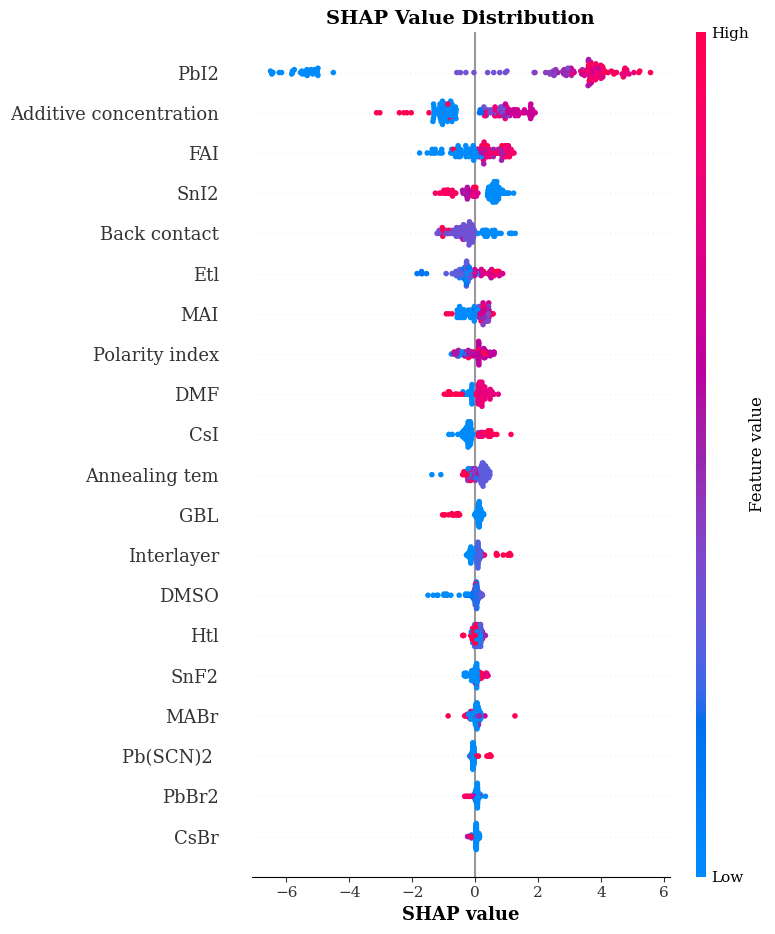

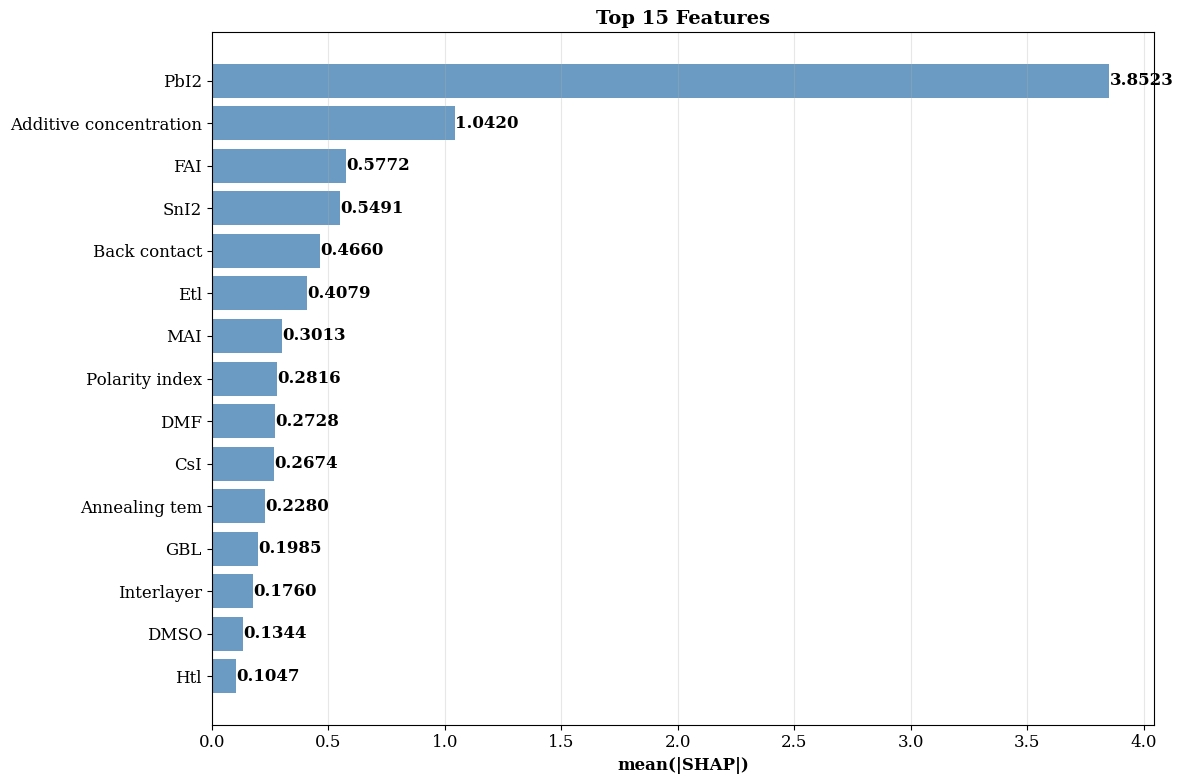

----------------------------------------------------------------------
BOOTSTRAP STABILITY
----------------------------------------------------------------------
Bootstrap: 30 iterations
Mean CV: 0.2459
Stable features (CV < 0.3): 14/20
Unstable features (CV > 0.5): 0/20


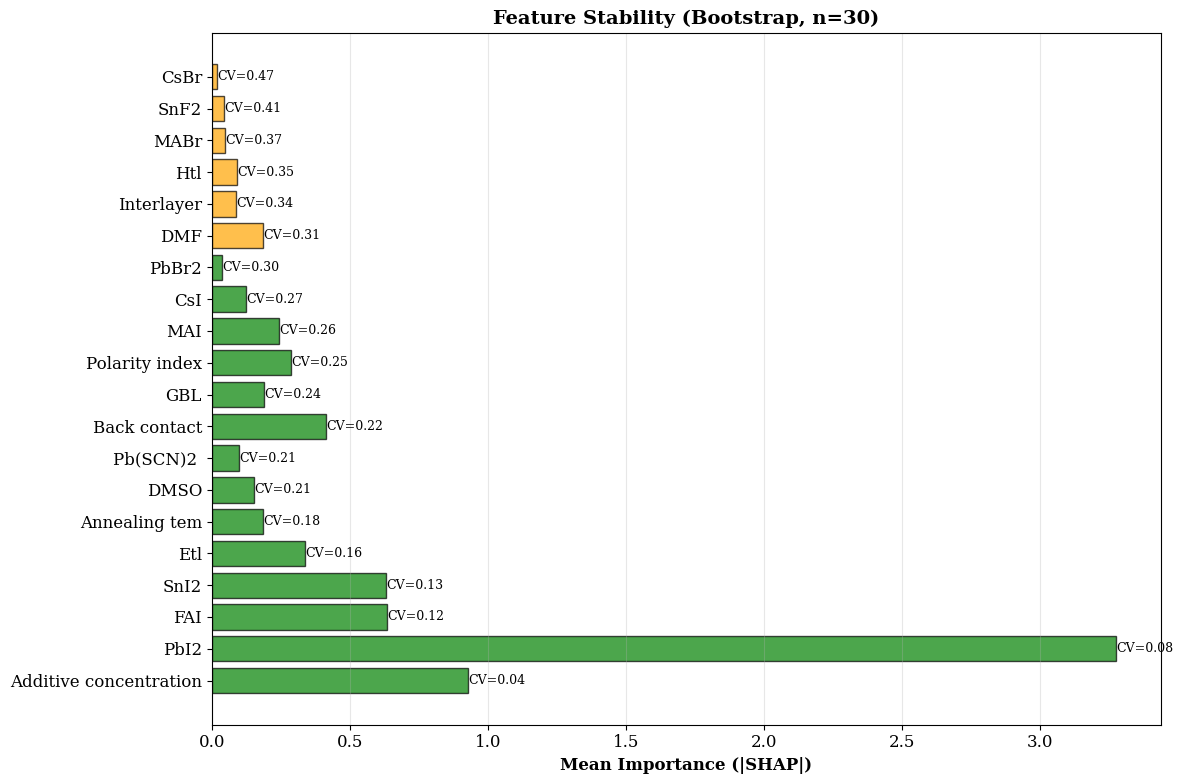

----------------------------------------------------------------------
TOP FEATURES CORRELATION
----------------------------------------------------------------------


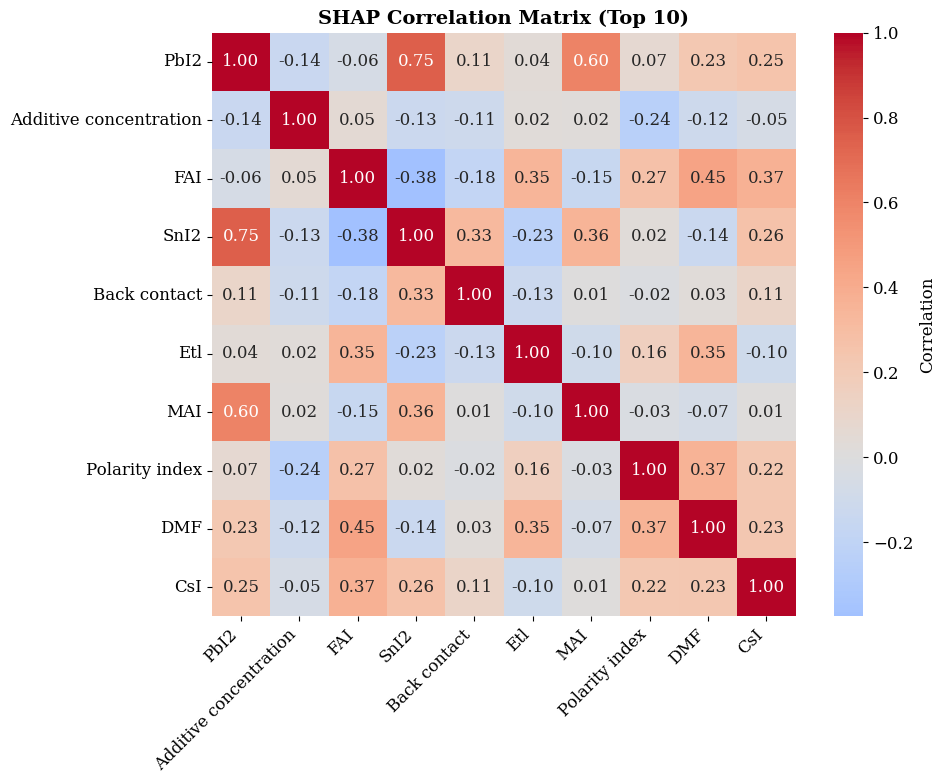

----------------------------------------------------------------------
ANALYSIS SUMMARY
----------------------------------------------------------------------
Top 5 features: PbI2, Additive concentration, FAI, SnI2, Back contact
Mean CV: 0.2459
Stable features: 14/20
Analysis complete.


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("="*70)
print("SHAP ANALYSIS")
print("="*70)

if hasattr(X_test, 'columns'):
    feature_names = X_test.columns.tolist()
else:
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns.tolist()
    else:
        feature_names = [f'Feature_{i}' for i in range(X_test.shape[1])]

if isinstance(X_train, np.ndarray):
    X_train_for_shap = pd.DataFrame(X_train, columns=feature_names)
    X_test_for_shap = pd.DataFrame(X_test, columns=feature_names)
else:
    X_train_for_shap = X_train
    X_test_for_shap = X_test

explainer = shap.PermutationExplainer(xgb_model.predict, X_train_for_shap)
shap_values = explainer(X_test_for_shap)

importance = np.abs(shap_values.values).mean(axis=0)

print(f"Features: {len(feature_names)}")
print(f"SHAP matrix: {shap_values.values.shape}")

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_for_shap, plot_type="bar", show=False)
plt.title("Feature Importance", fontweight='bold')
plt.xlabel("mean(|SHAP|)", fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_for_shap, show=False)
plt.title("SHAP Value Distribution", fontweight='bold')
plt.xlabel("SHAP value", fontweight='bold')
plt.tight_layout()
plt.show()

top_n = min(15, len(feature_names))
top_indices = np.argsort(-importance)[:top_n]
top_features = [feature_names[i] for i in top_indices]
top_importance = importance[top_indices]

plt.figure(figsize=(12, 8))
bars = plt.barh(range(top_n), top_importance[::-1], color='steelblue', alpha=0.8)
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel('mean(|SHAP|)', fontweight='bold')
plt.title(f'Top {top_n} Features', fontweight='bold')

for i, (bar, val) in enumerate(zip(bars, top_importance[::-1])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{val:.4f}', va='center', fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("-"*70)
print("BOOTSTRAP STABILITY")
print("-"*70)

def bootstrap_analysis(n_iterations=30):
    print(f"Bootstrap: {n_iterations} iterations")
    
    n_top_features = min(20, len(feature_names))
    top_feat_indices = np.argsort(-importance)[:n_top_features]
    
    bootstrap_importances = []
    
    for i in range(n_iterations):
        X_sample, y_sample = resample(X_train, y_train, random_state=i)
        
        model_temp = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=50,
            max_depth=4,
            learning_rate=0.1,
            random_state=i
        )
        
        if isinstance(X_sample, np.ndarray):
            X_sample_df = pd.DataFrame(X_sample, columns=feature_names)
        else:
            X_sample_df = X_sample
        
        model_temp.fit(X_sample_df, y_sample)
        
        explainer_temp = shap.PermutationExplainer(model_temp.predict, X_sample_df)
        
        if isinstance(X_test, np.ndarray):
            X_test_temp = pd.DataFrame(X_test, columns=feature_names)
        else:
            X_test_temp = X_test
        
        shap_temp = explainer_temp(X_test_temp)
        
        imp_temp = np.abs(shap_temp.values).mean(axis=0)
        bootstrap_importances.append(imp_temp[top_feat_indices])
    
    bootstrap_array = np.array(bootstrap_importances)
    
    cv_values = bootstrap_array.std(axis=0) / (bootstrap_array.mean(axis=0) + 1e-10)
    
    return pd.DataFrame({
        'Feature': [feature_names[i] for i in top_feat_indices],
        'Mean_Importance': bootstrap_array.mean(axis=0),
        'CV': cv_values,
        'Stable': cv_values < 0.3
    })

stability_results = bootstrap_analysis(n_iterations=30)

print(f"Mean CV: {stability_results['CV'].mean():.4f}")
print(f"Stable features (CV < 0.3): {stability_results['Stable'].sum()}/{len(stability_results)}")
print(f"Unstable features (CV > 0.5): {(stability_results['CV'] > 0.5).sum()}/{len(stability_results)}")

plt.figure(figsize=(12, 8))
stability_sorted = stability_results.sort_values('CV')
x_pos = np.arange(len(stability_sorted))
mean_imp = stability_sorted['Mean_Importance'].values
cv_values = stability_sorted['CV'].values

colors = ['green' if cv < 0.3 else 'orange' if cv < 0.5 else 'red' for cv in cv_values]
bars = plt.barh(x_pos, mean_imp, color=colors, alpha=0.7, edgecolor='black')

plt.yticks(x_pos, stability_sorted['Feature'].values)
plt.xlabel('Mean Importance (|SHAP|)', fontweight='bold')
plt.title(f'Feature Stability (Bootstrap, n=30)', fontweight='bold')

for i, (bar, cv) in enumerate(zip(bars, cv_values)):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'CV={cv:.2f}', va='center', fontsize=9)

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("-"*70)
print("TOP FEATURES CORRELATION")
print("-"*70)

top_10_indices = np.argsort(-importance)[:10]
top_10_features = [feature_names[i] for i in top_10_indices]
shap_top_10 = shap_values.values[:, top_10_indices]
corr_matrix = np.corrcoef(shap_top_10.T)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            xticklabels=top_10_features,
            yticklabels=top_10_features,
            square=True,
            cbar_kws={'label': 'Correlation'})

plt.title('SHAP Correlation Matrix (Top 10)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("-"*70)
print("ANALYSIS SUMMARY")
print("-"*70)

top_5_features = [feature_names[i] for i in np.argsort(-importance)[:5]]
mean_cv = stability_results['CV'].mean()
stable_count = stability_results['Stable'].sum()

print(f"Top 5 features: {', '.join(top_5_features)}")
print(f"Mean CV: {mean_cv:.4f}")
print(f"Stable features: {stable_count}/{len(stability_results)}")
print("Analysis complete.")